In this project I would like to build my own linear regression model from scratch without the help of Sklearn. I will be using the height and weight dataset. For my model I will use two different apporaches, first being a least squares approach. The other being, gradient descent approach.

In [2]:
from google.colab import files
uploaded = files.upload()


Saving SOCR-HeightWeight.csv to SOCR-HeightWeight (1).csv


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [4]:
df = pd.read_csv("SOCR-HeightWeight.csv")
print(df.head())

   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971


In [5]:
#Understanding the data

In [6]:
#We see that our dataset consists of 25000 entries with 3 variables: Index, Height(inches) and Weight(lbs)
df.shape

(25000, 3)

In [7]:
#I will not standardize my dataset for least squares approach but I will standardize for gradient descent approach.

In [8]:
#We should extract Height and Weight column and convert it into Numpy array
#We do this for couple reasons, first the data is in table structure, extracting as Numpy array will make us work with just the numerical datas.
#Also allows for more efficient and faster mathematical operations
X = df["Height(Inches)"].values
Y = df["Weight(Pounds)"].values

In [9]:
#Define everything needed for the Least Squares Formula
n = len(X)
sum_x = np.sum(X)
sum_y = np.sum(Y)
sum_xy = np.sum(X * Y)
sum_x2 = np.sum(X**2)

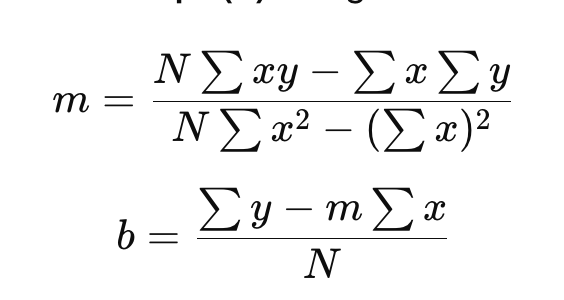

Using Least Squares: Slope (m) = 3.0834764454016637, Intercept (b) = -82.57574306445234


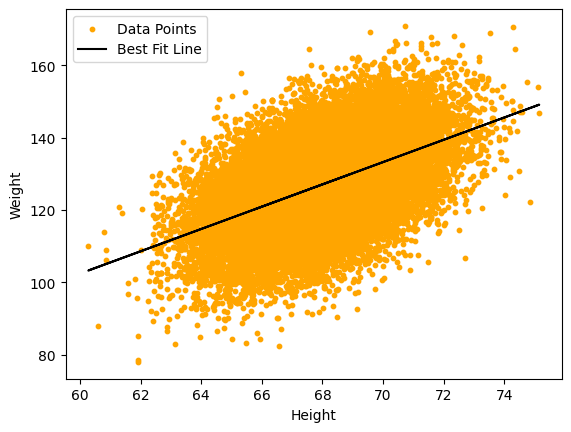

In [18]:
#Now will find 'm' and 'b' using the newly created values from above.
#m aka the slope, tells us how much weight increases for each extra inch of height
#b or the intercept is where the line crosses the Y-axis when height is 0.
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y - m * sum_x) / n

#lets print out the results
print(f"Using Least Squares: Slope (m) = {m}, Intercept (b) = {b}")

# lets create an array of predicted weight for every height
Y_pred = m * X + b

# we can visualize our best fit line with a scatter plot
plt.scatter(X, Y, color="orange",s=10, label="Data Points")
plt.plot(X, Y_pred, color="black", label="Best Fit Line")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.show()


In [11]:
# Lets see how well least squared method predicts weight based on height
mse = np.mean((Y - Y_pred) ** 2)

# Print results
print(f"Using Least Squares: Slope (m) = {m}, Intercept (b) = {b}")
print(f"Mean Squared Error (MSE) = {mse}")


Using Least Squares: Slope (m) = 3.0834764454016637, Intercept (b) = -82.57574306445234
Mean Squared Error (MSE) = 101.58853248632849


**Gradient Descent**

In [37]:
#Let us first extract the height and weight values into a x and y
x = df["Height(Inches)"].values
y = df["Weight(Pounds)"].values

# We will standardize when using the gradient descent approach because standardizing stabilizes learning and speeds up convergence.
# One thing to note after we standardize we must convert our values back to the original weight scale for real world use.
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)

In [42]:
#First we find the best fit line using gradient descent
#Learning rate is defualted to 0.01
def gradient_descent(x, y, learning_rate=0.0001, iterations=1000):
    m, b = 0, 0  # we initially set our slope and intercept equal to zero
    n = len(x)  # define n as number of data points

    #we will run interations through a loop to update our slope and intercept which we previously set to zero
    for _ in range(iterations):
        y_pred = m * x + b  # we calculate the predicted y values using the equation y=mx+b
        error = y - y_pred  # define error as actual y values - predicted y values/ this tells us how far off our predictions are

        # now we need an equation to find out how much we need to adjust our slope and intercept
        dm = (-2/n) * np.sum(x * error)
        db = (-2/n) * np.sum(error)

        # now we will move our slope and intercept in the direction that reduces error/ learning_rate controls how big or small the steps are, if the step is too big it will overshoot and if too small it will slow down the progress.
        m -= learning_rate * dm
        b -= learning_rate * db


    #lastly return the finalized and optimized values
    return m, b

# Note that you must play around and adjust the learning just right because higher learning rate causes divergence and lower learning rate causes slow convergence.
# Also I increased iterations to 5000 allowing the model to refine the slope and intercept more.
m_final, b_final = gradient_descent(x, y, learning_rate=0.001, iterations=5000)
print(f"Final parameters: m = {m_final}, b = {b_final}")


Final parameters: m = 0.5028359183228704, b = -4.400947091198782e-15


 From the final results we achieved we can conclude multiple things
 #1) m=1.87(rounded) means that for every 1 unit increase in height, weight increases by roughly 1.87 units
 #2) b = 0.01 this does not mean much in most cases because it is basically saying weight is 0.01 when height is 0. We can ignore this, it however should be a number close to zero so that fine.

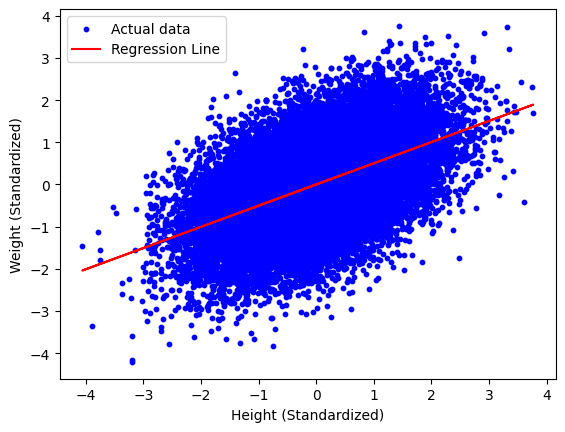

In [43]:
# Generate predictions
y_pred = m_final * x + b_final #we calculate the predicted y values using the equation y=mx+b

# Plot data points
plt.scatter(x, y, color="blue",s=10, label="Actual data")
plt.plot(x, y_pred, color="red", label="Regression Line")  # Best-fit line
plt.xlabel("Height (Standardized)")
plt.ylabel("Weight (Standardized)")
plt.legend()
plt.show()


In [44]:
#define mse
#compute average of all squared errors (np.mean)
#(y-y_pred) find the difference between actual values and calculated values
# then we square it so the negative errors dont cancel out the positive errors
mse = np.mean((y - y_pred) ** 2)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.7471333087679822


In [45]:
#Let us convert MSE back to original scale so we can compare much easier
#First let us store our original value
y_original = df["Weight(Pounds)"].values

#This calculates the variance (spread of values) in the original weight dataset.
y_variance_original = np.var(y_original)

#This calculates the Mean Squared Error (MSE) using standardized values after normalization
mse_standardized = np.mean((y - y_pred) ** 2)
#Convert MSE Back to the Original Scale
mse_original = mse_standardized * y_variance_original

print(f"Converted Mean Squared Error (Original Scale): {mse_original}")

Converted Mean Squared Error (Original Scale): 101.58853255579109


There are some key points to mention from the above code:


1.   Standardized MSE is in a different scale, so we must convert it back for meaningful interpretation.
2.   Variance is the key scaling factor, since standardization scales data, its variance lets us reverse the process.



In [46]:
# Compute original scale parameters
#To return to the original units, we multiply by the ratio of standard deviations.
m_original = m * (np.std(y) / np.std(x))
#Compute the Intercept in the Original Scale
b_original = np.mean(y) - m_original * np.mean(x)

print(f"Converted back: m = {m_original}, b = {b_original}")


Converted back: m = 3.0834764454016645, b = -2.279046959907882e-14


**CONCLUSION**

Both methods (Least Squares and Gradient Descent) produced nearly identical slope values:

    Least Squares: 3.0834764454016637
    Gradient Descent: 3.0834764454016645

This means that both approaches converge to the same optimal weight coefficient, which is what we are looking for.

Mean Squared Error Comparison:

    Least Squares MSE: 101.58853248632849
    Gradient Descent MSE (Converted): 101.58853255579109

The very small difference in MSE meanst that both methods resulted in nearly identical performance, ensuring the correctness ofthe gradient descent approach.
